## BUDA Capstone -  ETL Runner

In [2]:
pip install pandas

  Using cached pandas-1.4.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.7 MB)
  Using cached numpy-1.23.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install ipynb

  Using cached ipynb-0.5.1-py3-none-any.whl (6.9 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install wordcloud

     |████████████████████████████████| 458 kB 39.1 MB/s            
     |████████████████████████████████| 3.2 MB 24.8 MB/s            
     |████████████████████████████████| 11.2 MB 68.8 MB/s            
     |████████████████████████████████| 944 kB 69.8 MB/s            
     |████████████████████████████████| 1.6 MB 79.3 MB/s            
Note: you may need to restart the kernel to use updated packages.


### Import Packages

In [10]:
import pandas as pd
import json
import ipynb
from ipynb.fs.full.ETL_Functions import compileDataframes, convertJsontoDataframe, label_log, gen_log_counts, plot_log_counts, gen_wordcloud
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure


#### Import files in working directory

In [11]:
file_list = os.listdir()

### Begin conversion from JSON to CSV - BE CAREFUL RUNNING IN KUBERNETES
#### Converts  logstash ES output files to csv and classifies log type

In [12]:
for n in range(1,13):
    print(n)
    for file in file_list:
        if file.startswith('logstash'):
            # set up file name
            
            f = file[:-11]+'_pt'+f"{n:02d}"
            
            print(file)
            # read in current file and clean up
            complete = []
            
            logs = pd.read_csv(file)
            logs.columns = ['index','data']
            
            for i in logs.iterrows():
                i = i[1]['data']
                z = json.loads(i)
                complete.append(z)
            
            fin = pd.DataFrame()
            final = pd.DataFrame()
            df = pd.DataFrame(complete)
            if n == 1:
                df = df[:n]
            elif n == 12:
                df = df[n:]
            else:    
                df = df[n-1:n]
            
            for i in df.iterrows():
                c = i
                if len(c[1]['hits']) == 0:
                    print('empty')
                else:
                    print(pd.DataFrame(c[1]['hits']).columns)
                    final = convertJsontoDataframe(pd.DataFrame(c[1]['hits']))
                    fin = fin.append(final)
                    
            log_types = ['Error','Failure','Health Check',
                         'Infrastructure','Other']
            tough = label_log(fin, f)

1
logstash-2022.07.12_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
7345
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.11_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
7349
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.03_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
746
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.07_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
2919
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.06_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
430
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.10_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
7339
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.09_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
7368
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.02_output.txt
empty
logstash-2022.07.08_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
1580
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.04_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
746
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.05_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
745
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


2
logstash-2022.07.12_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
7351
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.11_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
7366
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.03_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
743
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.07_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
2254
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.06_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
427
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.10_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
7351
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.09_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
7338
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.02_output.txt
empty
logstash-2022.07.08_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
1588
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.04_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
746
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.05_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
679
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


3
logstash-2022.07.12_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
7352
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.11_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
7365
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.03_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
596
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.07_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
1789
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.06_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
430
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.10_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
7344
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.09_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
7383
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.02_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
58
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
logstash-2022.07.08_output.txt


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
1592
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.04_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
742
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.05_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
667
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


4
logstash-2022.07.12_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
7336
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.11_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
7347
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.03_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
504
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.07_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
1754
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.06_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
429
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.10_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
7345
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.09_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
7352
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.02_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
2073
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.08_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
7479
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.04_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
746
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.05_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
451
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


5
logstash-2022.07.12_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
7342
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.11_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
7344
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.03_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
502
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.07_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
1636
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.06_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
429
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.10_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
7339
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.09_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
7361
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.02_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
518
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.08_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
8963
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.04_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
743
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.05_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
310
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


6
logstash-2022.07.12_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
7346
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.11_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
7331
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.03_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
506
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.07_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
1625
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.06_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
430
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.10_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
7349
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.09_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
7347
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.02_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
771
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.08_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
7341
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.04_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
746
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.05_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
309
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


7
logstash-2022.07.12_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
7391
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.11_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
7334
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.03_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
503
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.07_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
1585
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.06_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
1217
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.10_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
7338
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.09_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
7341
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.02_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
1605
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.08_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
7360
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.04_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
746
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.05_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
316
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


8
logstash-2022.07.12_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
10000
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.11_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
7341
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.03_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
506
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.07_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
1588
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.06_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
1408
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.10_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
7351
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.09_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
7342
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.02_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
2286
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.08_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
7341
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.04_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
742
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.05_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
312
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


9
logstash-2022.07.12_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
10000
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.11_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
7379
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.03_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
506
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.07_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
1584
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.06_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
2780
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.10_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
7337
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.09_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
7333
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.02_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
5522
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.08_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
7346
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.04_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
746
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.05_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
310
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


10
logstash-2022.07.12_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
7345
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.11_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
7346
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.03_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
502
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.07_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
1582
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.06_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
2915
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.10_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
7348
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.09_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
7340
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.02_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
5397
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.08_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
7389
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.04_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
743
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.05_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
310
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


11
logstash-2022.07.12_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
5947
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.11_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
7343
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.03_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
574
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.07_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
1581
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.06_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
2944
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.10_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
7349
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.09_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
7340
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.02_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
5049
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.08_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
7339
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.04_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
746
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


logstash-2022.07.05_output.txt
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')
309
Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


/tmp/ipykernel_58/1435949422.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(final)


12
logstash-2022.07.12_output.txt
logstash-2022.07.11_output.txt
logstash-2022.07.03_output.txt
logstash-2022.07.07_output.txt
logstash-2022.07.06_output.txt
logstash-2022.07.10_output.txt
logstash-2022.07.09_output.txt
logstash-2022.07.02_output.txt
logstash-2022.07.08_output.txt
logstash-2022.07.04_output.txt
logstash-2022.07.05_output.txt


### Begin Chart and Cloud Creation - BE CAREFUL RUNNING IN KUBERNETES
#### Create Bar Graph and Word Cloud based on log content by index

/tmp/ipykernel_58/1189941387.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sub_compile = sub_compile.append(file)
/tmp/ipykernel_58/1189941387.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sub_compile = sub_compile.append(file)
/tmp/ipykernel_58/1189941387.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sub_compile = sub_compile.append(file)
/tmp/ipykernel_58/1189941387.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sub_compile = sub_compile.append(file)
/tmp/ipykernel_58/1189941387.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

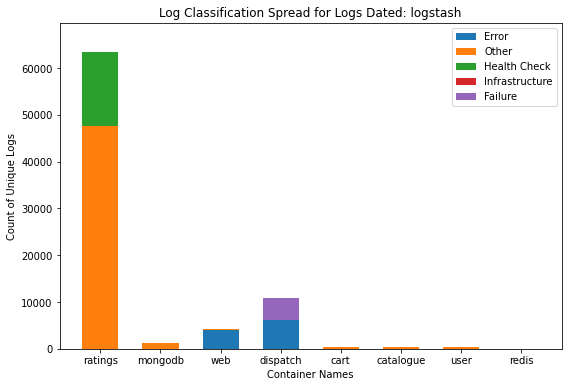

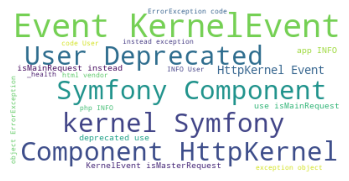

/tmp/ipykernel_58/1189941387.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sub_compile = sub_compile.append(file)
/tmp/ipykernel_58/1189941387.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sub_compile = sub_compile.append(file)
/tmp/ipykernel_58/1189941387.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sub_compile = sub_compile.append(file)
/tmp/ipykernel_58/1189941387.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sub_compile = sub_compile.append(file)
/tmp/ipykernel_58/1189941387.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

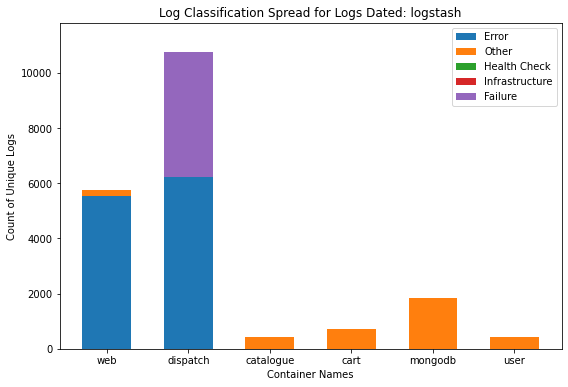

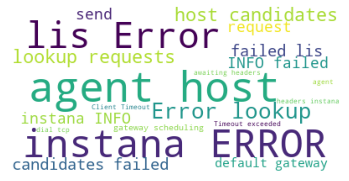

/tmp/ipykernel_58/1189941387.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sub_compile = sub_compile.append(file)
/tmp/ipykernel_58/1189941387.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sub_compile = sub_compile.append(file)
/tmp/ipykernel_58/1189941387.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sub_compile = sub_compile.append(file)
/tmp/ipykernel_58/1189941387.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sub_compile = sub_compile.append(file)
/tmp/ipykernel_58/1189941387.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

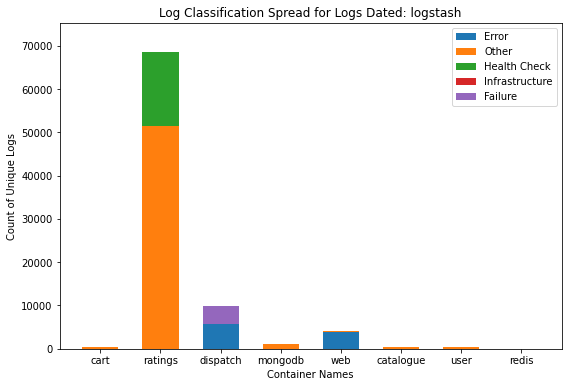

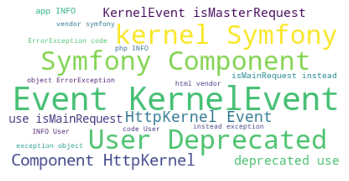

/tmp/ipykernel_58/1189941387.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sub_compile = sub_compile.append(file)
/tmp/ipykernel_58/1189941387.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sub_compile = sub_compile.append(file)
/tmp/ipykernel_58/1189941387.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sub_compile = sub_compile.append(file)
/tmp/ipykernel_58/1189941387.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sub_compile = sub_compile.append(file)
/tmp/ipykernel_58/1189941387.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

/home/jovyan/BUDA/ETL_Functions.ipynb:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  "        sub = fin.loc[fin['container_name'] == i]\n",
/home/jovyan/BUDA/ETL_Functions.ipynb:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  "        sub = fin.loc[fin['container_name'] == i]\n",
/home/jovyan/BUDA/ETL_Functions.ipynb:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  "        sub = fin.loc[fin['container_name'] == i]\n",
/home/jovyan/BUDA/ETL_Functions.ipynb:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  "        sub = fin.loc[fin['container_name'] == i]\n",
/home/jovyan/BUDA/ETL_Functions.ipynb:46: FutureWarning: The frame.appen

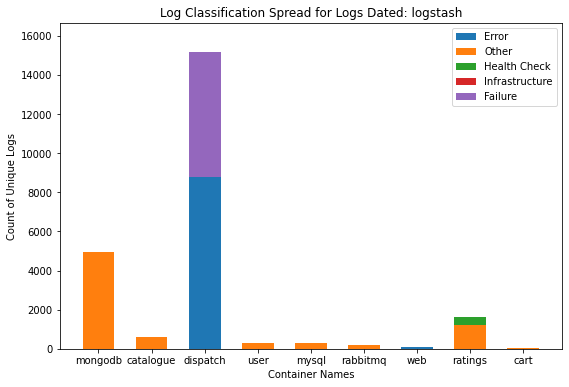

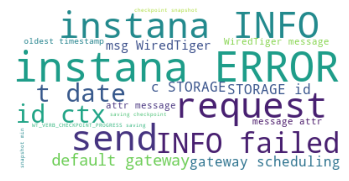

/tmp/ipykernel_58/1189941387.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sub_compile = sub_compile.append(file)
/tmp/ipykernel_58/1189941387.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sub_compile = sub_compile.append(file)
/tmp/ipykernel_58/1189941387.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sub_compile = sub_compile.append(file)
/tmp/ipykernel_58/1189941387.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sub_compile = sub_compile.append(file)
/tmp/ipykernel_58/1189941387.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

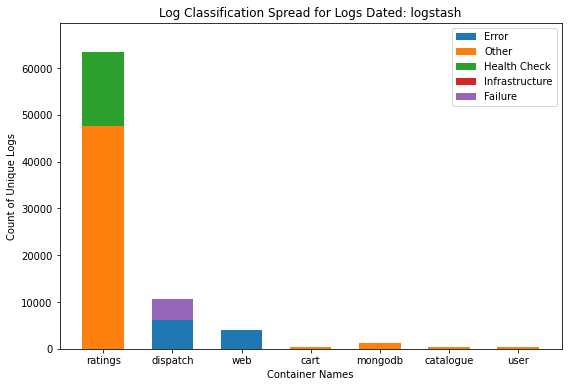

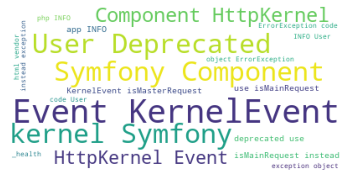

/tmp/ipykernel_58/1189941387.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sub_compile = sub_compile.append(file)
/tmp/ipykernel_58/1189941387.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sub_compile = sub_compile.append(file)
/tmp/ipykernel_58/1189941387.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sub_compile = sub_compile.append(file)
/tmp/ipykernel_58/1189941387.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sub_compile = sub_compile.append(file)
/tmp/ipykernel_58/1189941387.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

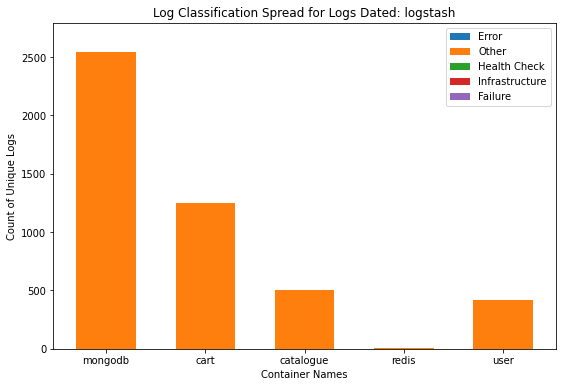

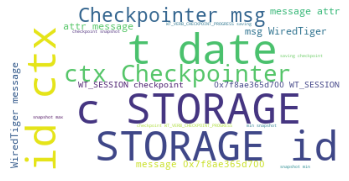

/tmp/ipykernel_58/1189941387.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sub_compile = sub_compile.append(file)
/tmp/ipykernel_58/1189941387.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sub_compile = sub_compile.append(file)
/tmp/ipykernel_58/1189941387.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sub_compile = sub_compile.append(file)
/tmp/ipykernel_58/1189941387.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sub_compile = sub_compile.append(file)
/tmp/ipykernel_58/1189941387.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

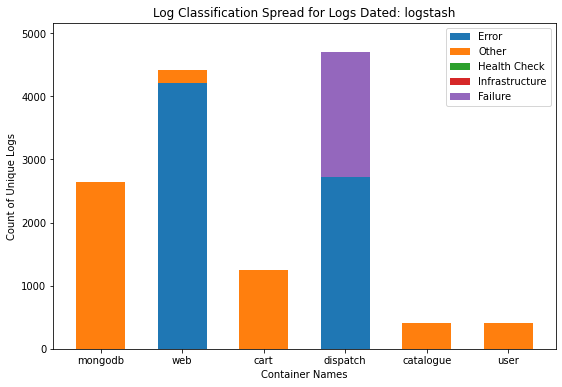

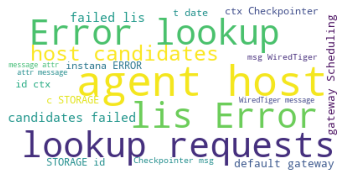

/tmp/ipykernel_58/1189941387.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sub_compile = sub_compile.append(file)
/tmp/ipykernel_58/1189941387.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sub_compile = sub_compile.append(file)
/tmp/ipykernel_58/1189941387.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sub_compile = sub_compile.append(file)
/tmp/ipykernel_58/1189941387.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sub_compile = sub_compile.append(file)
/tmp/ipykernel_58/1189941387.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

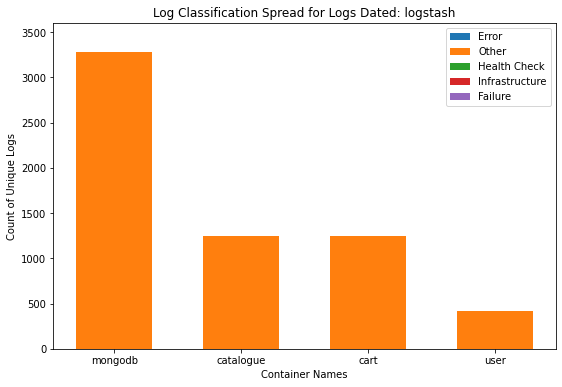

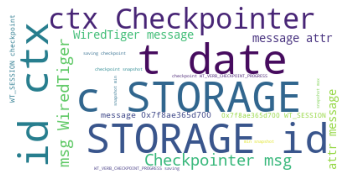

/tmp/ipykernel_58/1189941387.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sub_compile = sub_compile.append(file)
/tmp/ipykernel_58/1189941387.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sub_compile = sub_compile.append(file)
/tmp/ipykernel_58/1189941387.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sub_compile = sub_compile.append(file)
/tmp/ipykernel_58/1189941387.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sub_compile = sub_compile.append(file)
/tmp/ipykernel_58/1189941387.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

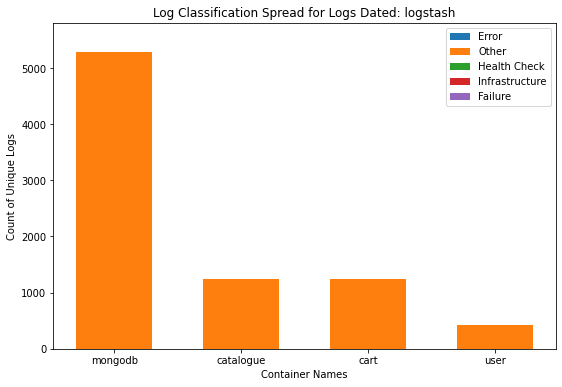

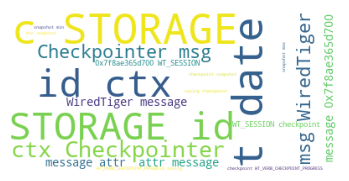

/tmp/ipykernel_58/1189941387.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sub_compile = sub_compile.append(file)
/tmp/ipykernel_58/1189941387.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sub_compile = sub_compile.append(file)
/tmp/ipykernel_58/1189941387.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sub_compile = sub_compile.append(file)
/tmp/ipykernel_58/1189941387.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sub_compile = sub_compile.append(file)
/tmp/ipykernel_58/1189941387.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

/home/jovyan/BUDA/ETL_Functions.ipynb:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  "        sub = fin.loc[fin['container_name'] == i]\n",
/home/jovyan/BUDA/ETL_Functions.ipynb:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  "        sub = fin.loc[fin['container_name'] == i]\n",
/home/jovyan/BUDA/ETL_Functions.ipynb:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  "        sub = fin.loc[fin['container_name'] == i]\n",
/home/jovyan/BUDA/ETL_Functions.ipynb:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  "        sub = fin.loc[fin['container_name'] == i]\n",
/home/jovyan/BUDA/ETL_Functions.ipynb:46: FutureWarning: The frame.appen

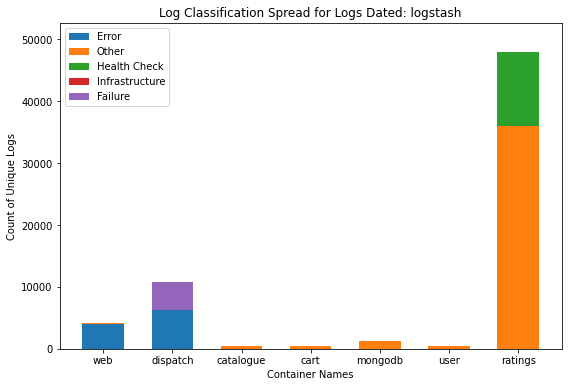

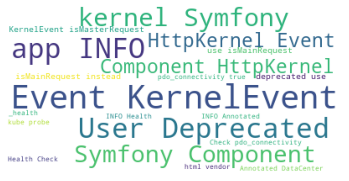

/tmp/ipykernel_58/1189941387.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sub_compile = sub_compile.append(file)
/tmp/ipykernel_58/1189941387.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sub_compile = sub_compile.append(file)
/tmp/ipykernel_58/1189941387.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sub_compile = sub_compile.append(file)
/tmp/ipykernel_58/1189941387.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sub_compile = sub_compile.append(file)
/tmp/ipykernel_58/1189941387.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

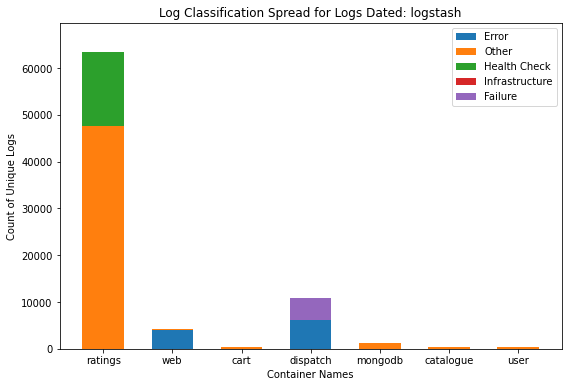

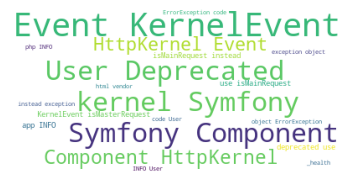

In [13]:
# Create counts and chart
 
afile_list = os.listdir('analyzed')

master_nums = []

for f in afile_list:
    if (f.startswith('logstash')) and not (f.endswith('.csv')):
        path = 'images/'+f
        isExist = os.path.exists(path)
        if not isExist:
            os.makedirs(path)
        sub_compile = pd.DataFrame()
        new = []
        # for af in afile_list:
        #     if af.startswith(f[:-11]):
        #         new.append(af)
        for da in os.listdir('analyzed/'+f):
            file = pd.read_csv('analyzed/'+f+'/'+da)
            sub_compile = sub_compile.append(file)
        log_types = ['Error','Failure','Health Check',
                     'Infrastructure','Other']
        nums = gen_log_counts(sub_compile, log_types)
        master_nums.append(nums)
        plot_log_counts(nums, f)
        gen_wordcloud(sub_compile, f)